<a href="https://colab.research.google.com/github/Sripriya07/assignment-week-4/blob/master/Handwritten_digit_recognition_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
%matplotlib inline

In [0]:
from keras.layers import Dense,Activation
from keras.models import Sequential
from keras.utils import np_utils

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [85]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


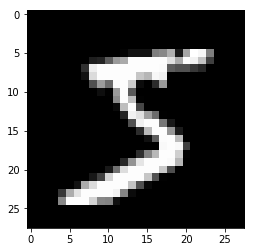

In [86]:
plt.imshow(x_train[0],cmap='gray')

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0],784)
x_test = x_test.reshape(x_test.shape[0],784)

In [88]:
print(x_train.shape,x_test.shape)


(60000, 784) (10000, 784)


In [0]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255


In [0]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [91]:
print(y_train.shape,y_test.shape)

(60000, 10) (10000, 10)


In [141]:
model = Sequential()
model.add(Dense(51, input_shape=(784,)))
model.add(Activation("relu"))

model.add(Dense(25))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 51)                40035     
_________________________________________________________________
activation_22 (Activation)   (None, 51)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 25)                1300      
_________________________________________________________________
activation_23 (Activation)   (None, 25)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                260       
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 41,595
Trainable params: 41,595
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',          
              metrics=['accuracy'])      

In [144]:
model.fit(x_train,y_train,
          batch_size=16,
          nb_epoch=20,
          verbose=2,
          validation_data=(x_test,y_test) )      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 11s - loss: 0.1257 - acc: 0.9624 - val_loss: 0.1142 - val_acc: 0.9650
Epoch 2/20
 - 11s - loss: 0.0951 - acc: 0.9706 - val_loss: 0.1059 - val_acc: 0.9691
Epoch 3/20
 - 11s - loss: 0.0758 - acc: 0.9765 - val_loss: 0.1079 - val_acc: 0.9663
Epoch 4/20
 - 11s - loss: 0.0648 - acc: 0.9793 - val_loss: 0.1074 - val_acc: 0.9696
Epoch 5/20
 - 11s - loss: 0.0566 - acc: 0.9819 - val_loss: 0.1041 - val_acc: 0.9706
Epoch 6/20
 - 11s - loss: 0.0490 - acc: 0.9840 - val_loss: 0.1018 - val_acc: 0.9720
Epoch 7/20
 - 11s - loss: 0.0438 - acc: 0.9859 - val_loss: 0.0990 - val_acc: 0.9745
Epoch 8/20
 - 11s - loss: 0.0411 - acc: 0.9869 - val_loss: 0.1047 - val_acc: 0.9731
Epoch 9/20
 - 11s - loss: 0.0348 - acc: 0.9886 - val_loss: 0.1071 - val_acc: 0.9744
Epoch 10/20
 - 11s - loss: 0.0325 - acc: 0.9892 - val_loss: 0.1139 - val_acc: 0.9706
Epoch 11/20
 - 11s - loss: 0.0294 - acc: 0.9904 - val_loss: 0.1368 - val_acc: 0.9683
Epoch 12/20
 - 11s - los

In [146]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 39us/step


[0.14982286275983933, 0.9712]

The predicted number is :  6


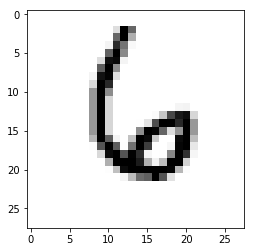

In [147]:
image_index = 4446
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,784))
print('The predicted number is : ' ,pred.argmax())

In [0]:
from PIL import Image


[7]


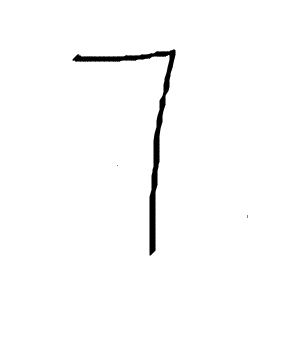

In [153]:
img = Image.open('seven.png')
img = np.resize(img, (28,28))

im2arr = np.array(img)
im2arr = im2arr.reshape(1,784)
y_pred = model.predict_classes(im2arr)
print(y_pred)
Image.open('seven.png')